## Task 1

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df=pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [41]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


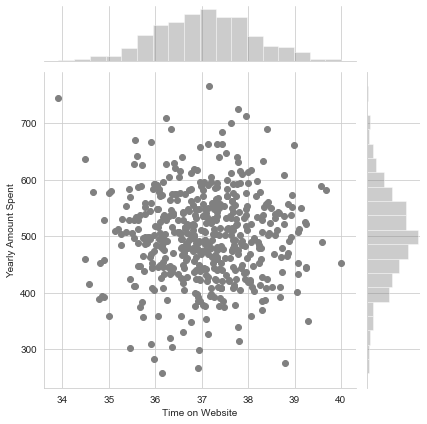

In [43]:
import seaborn as sns
sns.set_style("whitegrid")
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,color='grey')
plt.show()

# Comparing time spent on the app and amount of money spent yearly

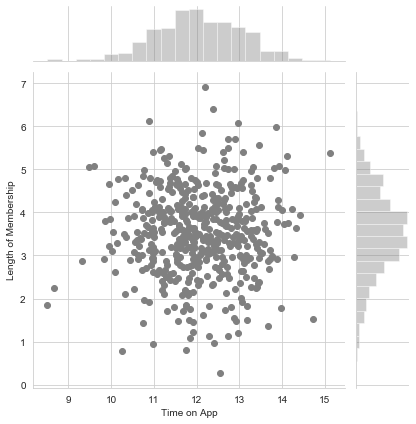

In [44]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df,color='grey')
plt.show()

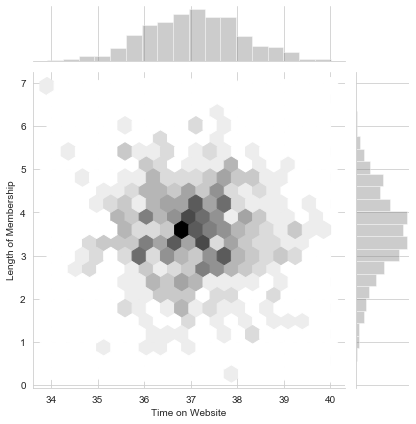

In [45]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=df,kind='hex',color='grey')
plt.show()

# Pair Plot

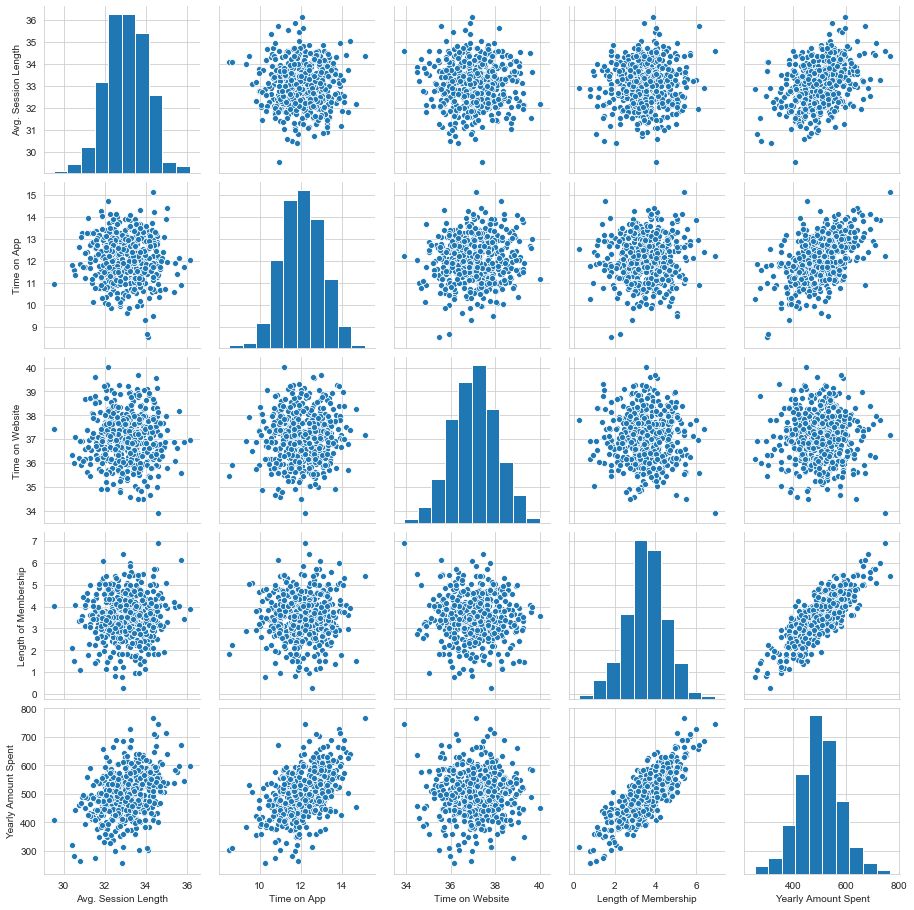

In [46]:
sns.pairplot(df)
plt.show()

From the pairplot above we can observe that the length of membership is most related to the yearly amount spent by the consumers.

# Linear model plot of Yearly Amount Spent vs. Length of Membership.

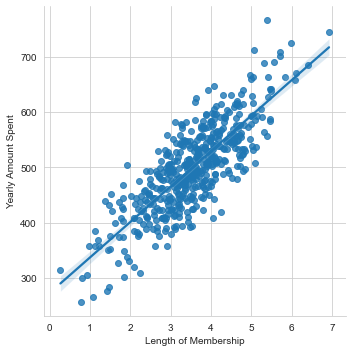

In [47]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.show()

# Split the data into training and testing set

In [48]:
X=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Model Tarining

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Co-efficient of model

In [21]:
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [25.98154972 38.59015876  0.19040527 61.27909654]


# Predicting Test Data

In [50]:
y_pred =lm.predict(X_test)

# Scatterplot of the real test values versus the predicted values.

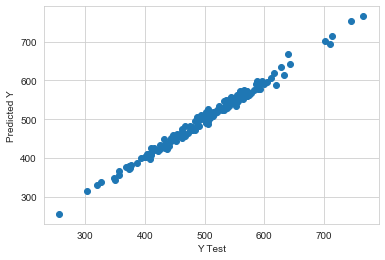

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Evaluating the Model

In [52]:
from sklearn import metrics
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMSE= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  7.228148667775284
MSE=  79.81305181284598
RMSE=  8.933815076038119


In [57]:
#sns.distplot((y_test-y_pred),bins=40);

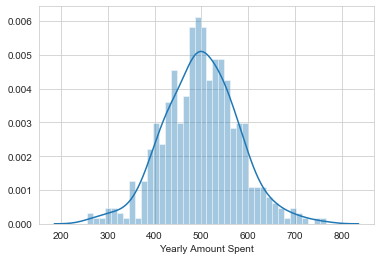

In [58]:
sns.distplot(df['Yearly Amount Spent'],bins=40);

In [37]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'] )
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Do you think the company should focus more on their mobile app or on their website?

Using the predictions above i think compny can improve the app experience so that the users spend more of their time on the app or company can also focus on the website and develop it so that it becomes as efficient as the app